<a href="https://colab.research.google.com/github/raigit/ML_GNN_PRACTICE/blob/master/Graph_Attention_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instead of calculating static weights based on node degrees like Graph Convolutional Networks(GCNs)
# They assign dynamic weights to node features through a process called self-attention
# The main idea behind GATs is that some neighbors are more important than others, regardless of their node degrees

In [1]:
import torch
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

import numpy as np
np.random.seed(0)

import networkx as nx
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 24})

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 11.2 MB/s eta 0:00:00


In [2]:
# 1. Graph data

In [4]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root = '.', name = 'CiteSeer')
data = dataset[0]

print(f'Number of graphs : {len(dataset)}')
print(f'Number of nodes : {data.x.shape[0]}')
print(f'Number of features : {dataset.num_features}')
print(f'Number of classes : {dataset.num_classes}')
print(f'Has isolated nodes : {data.has_isolated_nodes()}')
# this isolated nodes will be a challenge since we cannot rely on any aggregation
# this is how an MLP processes nodes L it cannot consider the adjacency matrix, which decreases its accuracy

Number of graphs : 1
Number of nodes : 3327
Number of features : 3703
Number of classes : 6
Has isolated nodes : True


In [5]:
data

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])

<BarContainer object of 32 artists>

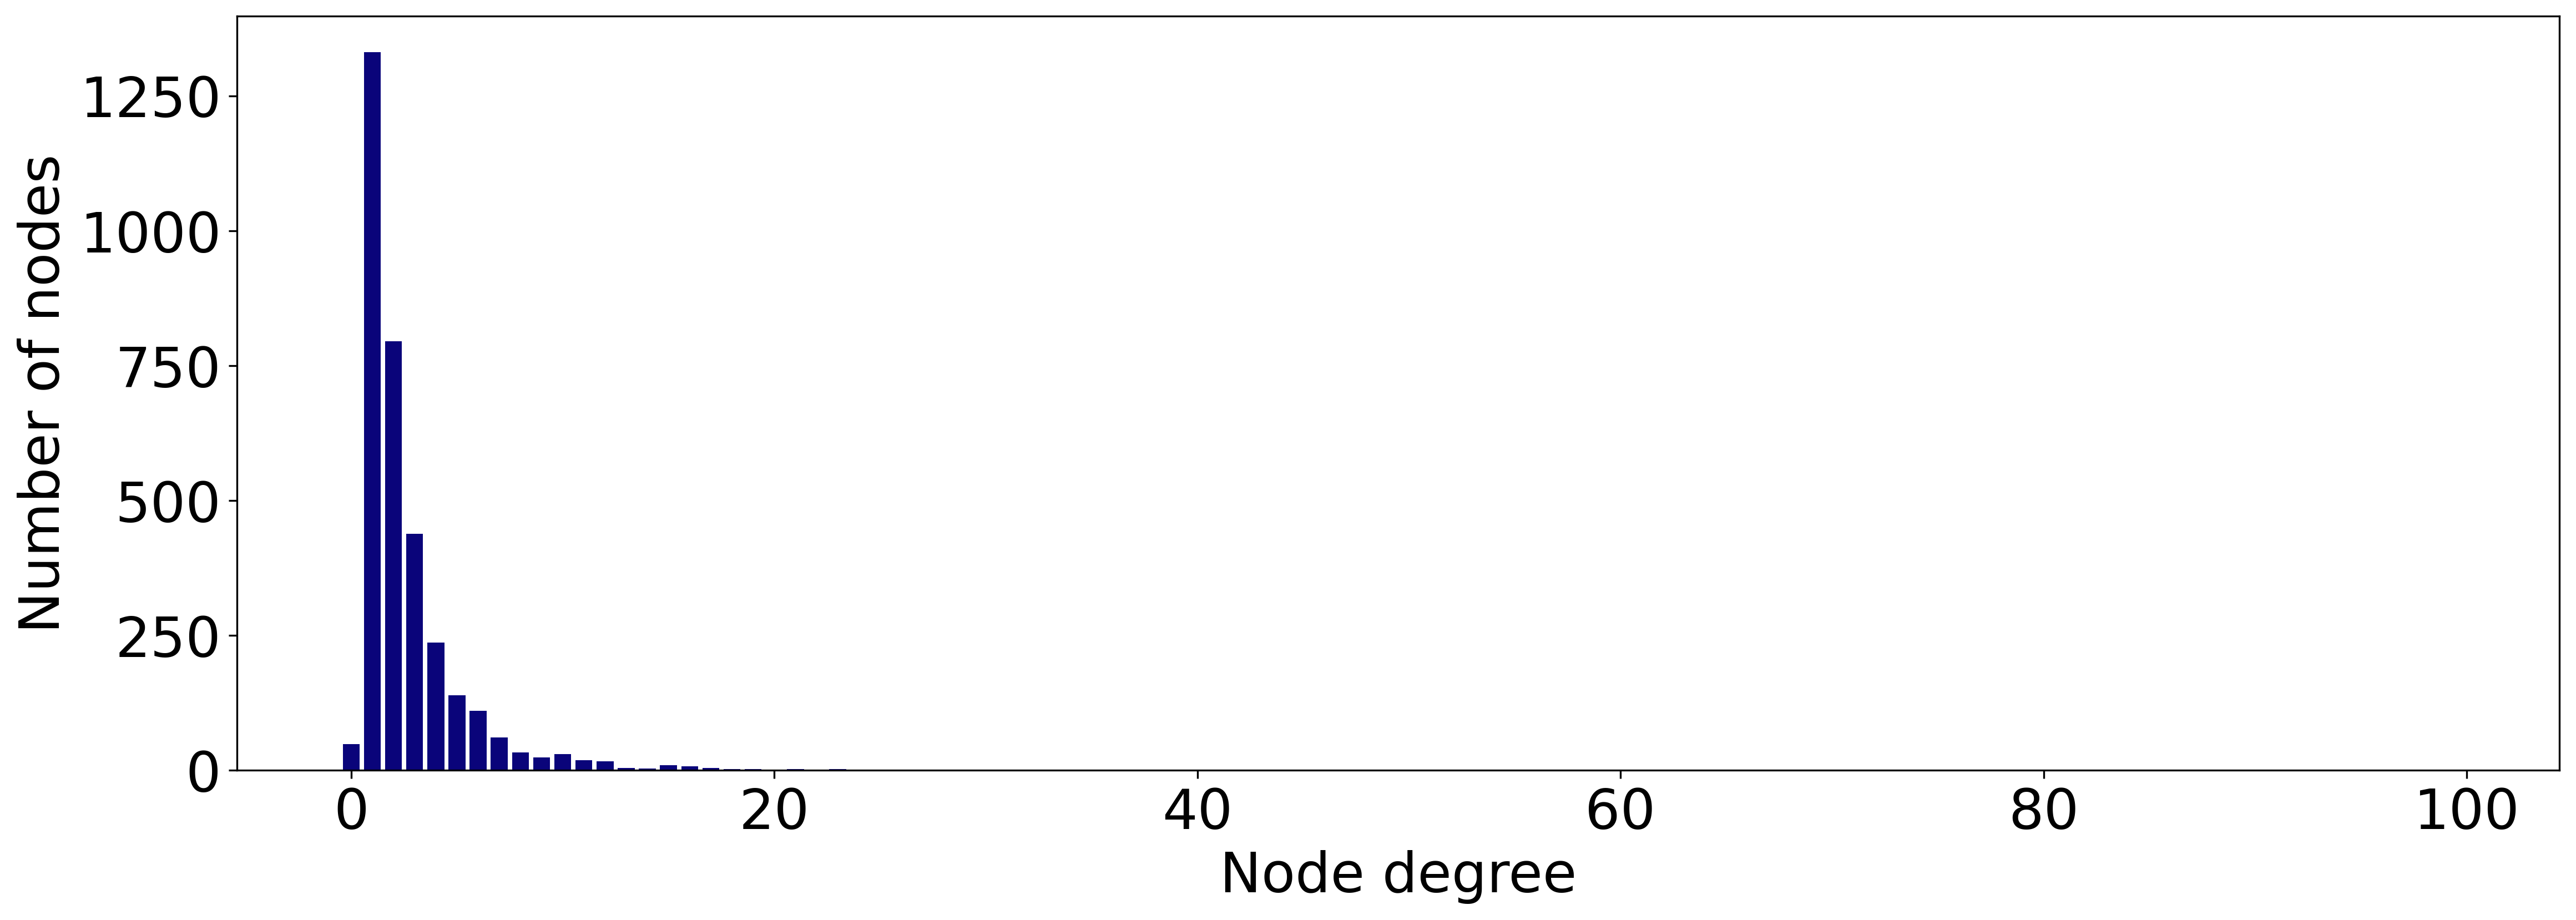

In [7]:
from torch_geometric.utils import degree
from collections import Counter

degrees = degree(data.edge_index[0]).numpy()
numbers = Counter(degrees)
# Node degree란 노드에 연결된 엣지 수의 합을 말한다.
# 즉 노드가 몇 개의 이웃을 가지는 지를 표현한 것이라 할 수 있다.

fig, ax = plt.subplots(figsize=(18, 6))
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(),
        numbers.values(),
        color='#0A047A')

In [ ]:
# 2. Graph Attention Layer

In [ ]:
# Self attention in GATs relies on a simple idea
# some nodes are more important than others

# self-attention calculates the importance of nodes
# and we denote aij the importance of node j's features to node i

# Each node i has an attribute vector xi
# The GAT layer calculates the embedding of node 1 as s um of attention coefficients multiplied by a shared weight matrix W
# hi = a11Wx1 + a12Wx2 + a13Wx3 + a14Wx4
# how can we calculate attention coefficients?
# there are four steps in his process

In [ ]:
# 2-1. Linear transformation

# to calculate the attention coefficient, we need to consider pairs of nodes
# an easy way to create these pairs is to concatenate attribute vectors from both nodes
 # then we can apply a new linear transformation with a weight matrix Watt

In [ ]:
# 2-2. Activation function

# Second step is to add nonlinearity with an activation function
# In this case, the paper's authors chose the LeakyReLU function
# eij = LeakyReLU(aij)

In [ ]:
# 2-3. Softmax normalization

# the output of our neural network is not normalized, which is a problem since we want to compare these coefficients
# For example to be able to say if node 2 is more important to node 1 than node 3 we need to use the same scale
# A common way to do it with neural networks is to use the softmax function
# aij = softmaxj(eij)

In [ ]:
# 2-4. Multi-head attention

# In GATs, multi-head attention consists of replicating the same three steps everal times in order to average or concatenate the results
# instead of a single embedding h1, we get one embedding per attention head
# in practice, use concatenation scheme when it's a hidden layer
# average scheme when it's the last layer